In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
X= train_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]
y= train_data["Survived"]
X.head()
# y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
X["Cabin"] = X["Cabin"].fillna(0)
X["Cabin"] = np.where(X["Cabin"] != 0 ,1,0)

X.isna().sum().sort_values()
# X["Cabin"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
Age         177
dtype: int64

In [6]:
y.isna().sum()

0

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2,random_state= 21,stratify=y)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant'), ["Age"]),
        ('cat', categorical_transformer, ["Sex","Embarked","Cabin"])
    ])

####################checking logi
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model = LogisticRegression(solver='liblinear'
# , penalty='l1')
# train_errs = list()
# valid_errs = list()

# # Loop over values of C_value
# for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
#     # Create LogisticRegression object and fit
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('scaler',StandardScaler()),
#                               ('model', LogisticRegression(C=C_value))
#                              ])
#     pipeline.fit(X_train,y_train)
    
#     # Evaluate error rates and append to lists
#     train_errs.append( 1.0 - pipeline.score(X_train,y_train) )
#     valid_errs.append( 1.0 - pipeline.score(X_test,y_test) )
#     y_pred = pipeline.predict(X_test)
#     print(accuracy_score(y_pred,y_test))
    
# # Plot results
# plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100, 1000], train_errs, [0.001, 0.01, 0.1, 1, 10, 100, 1000], valid_errs)
# plt.legend(("train", "validation"))
# plt.show()

############################checking logi ########################################
model = KNeighborsClassifier(n_neighbors=6)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler',StandardScaler()),
                              ('model', LogisticRegression(C=0.01))
                             ])
# pipeline.fit(X_train,y_train)
# y_pred = pipeline.predict(X_test)
# print(accuracy_score(y_pred,y_test))

pipeline.fit(X,y)
# pipeline.transform(X_test)
y_pred = pipeline.predict(test_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]])


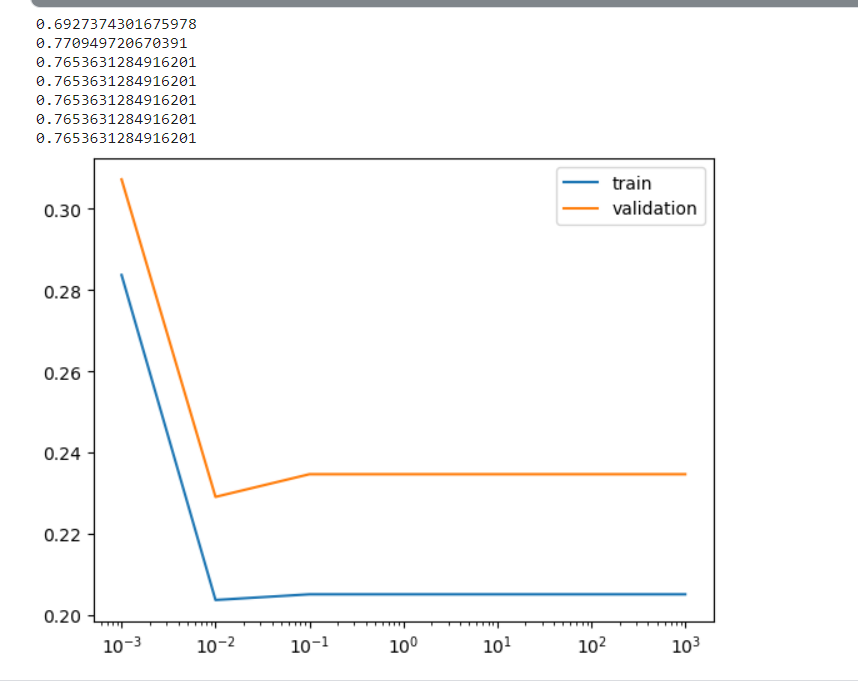

In [9]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submissionlessvar.csv', index=False)
print("Your submission was successfully saved!")
# #li regression --- 0.7653631284916201

Your submission was successfully saved!


In [10]:
#0.7597765363128491 -- passenger id
# 0.7597765363128491
# 0.7597765363128491-- without cabin